In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf

In [2]:
working_path = os.path.dirname(os.getcwd())
data_path = os.path.join(working_path, "data")
noise_path = os.path.join(data_path, "ESC-50-master", "ESC-50-master")
noise_audio_path = os.path.join(noise_path, "audio")
noise_meta_path = os.path.join(noise_path, "meta", "esc50.csv")
clean_voice_path = os.path.join(data_path, "train-clean-100", "LibriSpeech", "train-clean-100")
model_path = os.path.join(working_path, "model")

In [3]:
all_clean_voice_wave_file : list[str] = []
for primary_dir in os.listdir(clean_voice_path):
    primary_dir_path = os.path.join(clean_voice_path, primary_dir)
    for sub_dir in os.listdir(primary_dir_path):
        sub_dir_path = os.path.join(primary_dir_path, sub_dir)
        all_clean_voice_wave_file.extend([os.path.join(sub_dir_path, wave_path) for wave_path in os.listdir(sub_dir_path)])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Person\\CaoHoc\\XuLyTiengNoi\\Demo\\demo\\data\\train-clean-100\\LibriSpeech\\train-clean-100'

In [4]:
script_file = []
all_clean_voice_wave_file_without_txt = all_clean_voice_wave_file[:]
for file in all_clean_voice_wave_file:
    if file.endswith(".txt"):
        script_file.append(file)
        all_clean_voice_wave_file_without_txt.remove(file)
del all_clean_voice_wave_file

In [17]:
def get_total_hours_list_audio(list_audio: list[str]) -> int:
    total_second = 0
    for audio in list_audio:
        y, sr = librosa.load(audio)
        S = librosa.stft(y)
        total_second += librosa.get_duration(S=S, sr=sr)
    return round(total_second /60 / 60)

In [24]:
def show_spectrogram(y, sr, title):
    librosa.feature.melspectrogram(y=y, sr=sr)

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=sr, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title=title)

In [13]:
hours_of_voice = get_total_hours_list_audio(all_clean_voice_wave_file_without_txt)
print(hours_of_voice)
del hours_of_voice

26

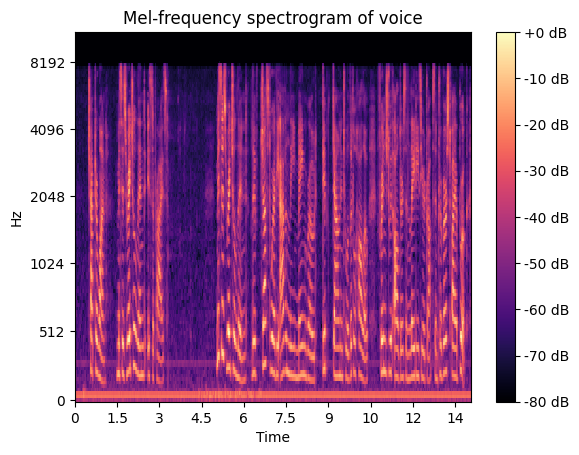

In [25]:
y, sr = librosa.load(all_clean_voice_wave_file_without_txt[0])
show_spectrogram(y, sr, "Mel-frequency spectrogram of voice")

In [18]:
all_noise_path = []
for file in os.listdir(noise_audio_path):
    all_noise_path.append(os.path.join(noise_audio_path, file))

In [21]:
hours_of_noise = get_total_hours_list_audio(all_noise_path)
print(hours_of_noise)
del hours_of_noise

3


In [104]:
df_noise_meta = pd.read_csv(noise_meta_path)

In [111]:
len(set(df_noise_meta['category']))

50

Có 50 loại tiếng ồn trong tập dữ liệu ESC-50

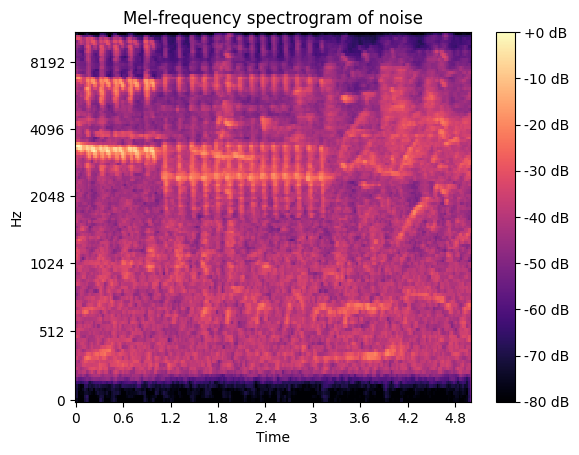

In [30]:
# Khảo sát tiếng ồn trong tập dữ liệu
y, sr = librosa.load(all_noise_path[1])
yt, index = librosa.effects.trim(y)
show_spectrogram(yt, sr, "Mel-frequency spectrogram of noise")

In [67]:
y_in, sr_in = librosa.load(all_clean_voice_wave_file_without_txt[0])
y_ou, sr_ou = librosa.load(all_noise_path[1])
chunk_duration = 2
chunk_samples_in = int(chunk_duration * sr_in)
chunk_samples_ou = int(chunk_duration * sr_ou)
chunks_in = y_in[0:chunk_samples_in]
chunks_ou = y_ou[0:chunk_samples_ou]

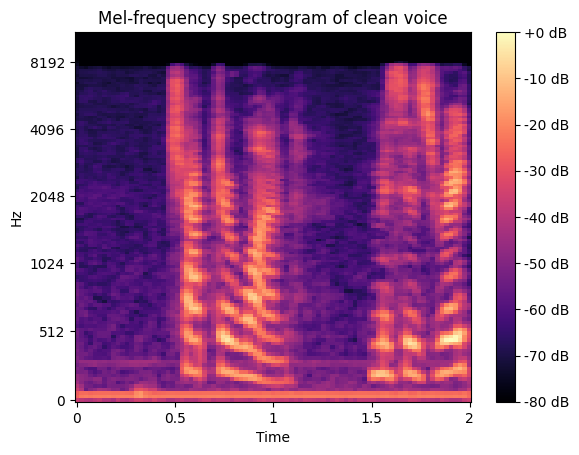

In [68]:
show_spectrogram(chunks_in, sr_in, "Mel-frequency spectrogram of clean voice")

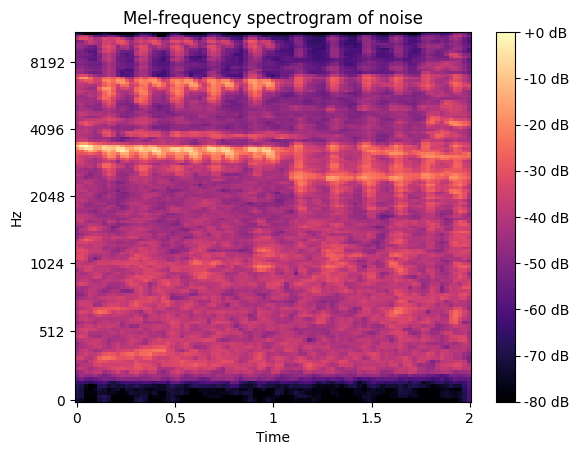

In [70]:
show_spectrogram(chunks_ou, sr_ou, "Mel-frequency spectrogram of noise")

## Clean voice and Noise Spectrogram
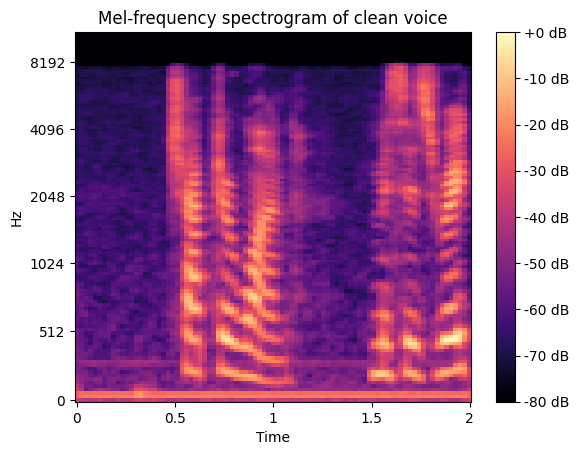
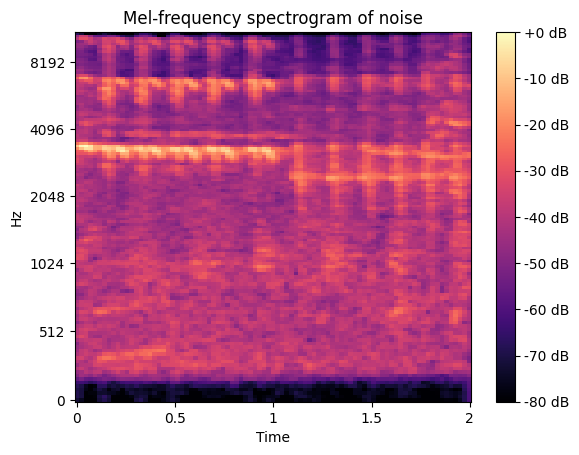

In [53]:
from IPython.display import Audio
mix = (chunks_in+chunks_ou)/2
sr_mix = int((sr_in+sr_ou)/2)

Audio(data=mix, rate=sr_mix)

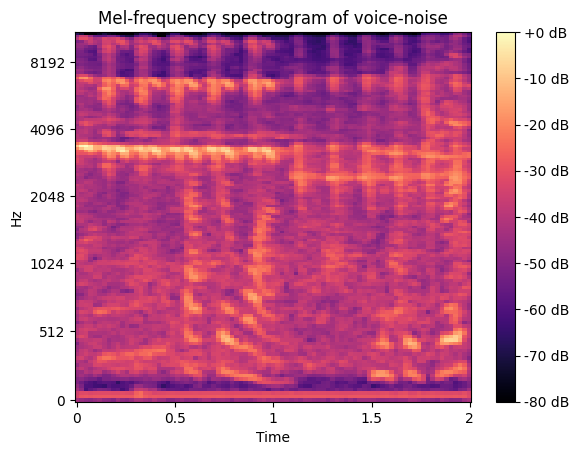

In [60]:
show_spectrogram(mix, sr_mix, "Mel-frequency spectrogram of voice-noise")

In [114]:
voice_sub_noise = (mix-chunks_in*2)
sr_sub_noise = int((sr_in+sr_ou)/2)

In [85]:
mix[0]

-0.017679755

In [86]:
chunks_in[0]

-0.0060544703

In [87]:
mix[0] - chunks_in[0]

-0.011625284

In [88]:
voice_sub_noise[0]

-0.011625284

In [115]:
Audio(data=voice_sub_noise, rate=sr_sub_noise)

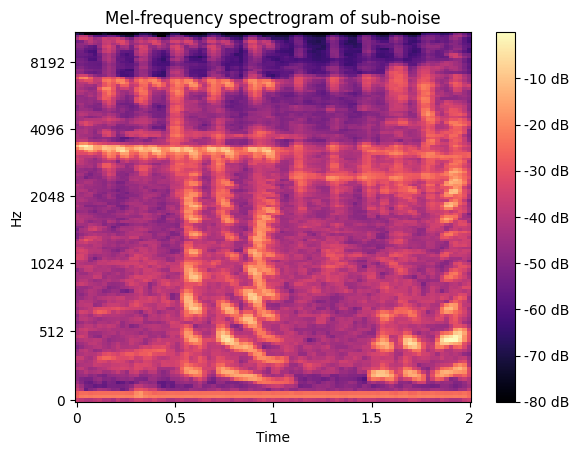

In [116]:
show_spectrogram(voice_sub_noise, sr_sub_noise, "Mel-frequency spectrogram of sub-noise")

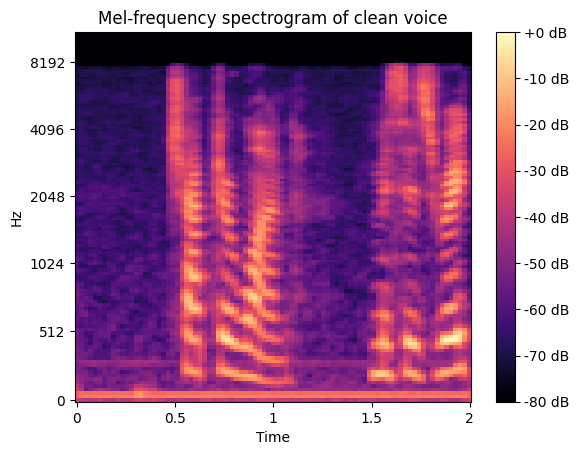
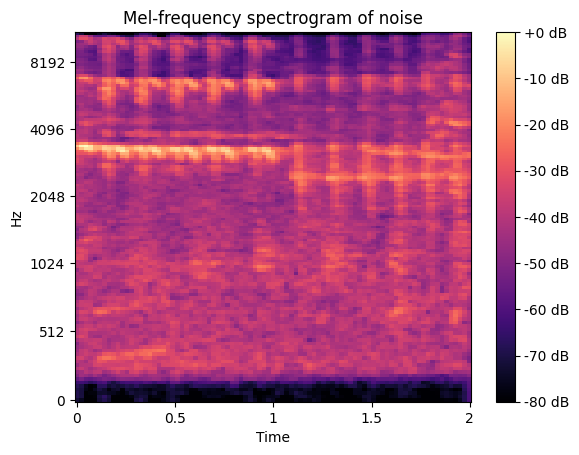

## Compare with voice-noise and sub-noise
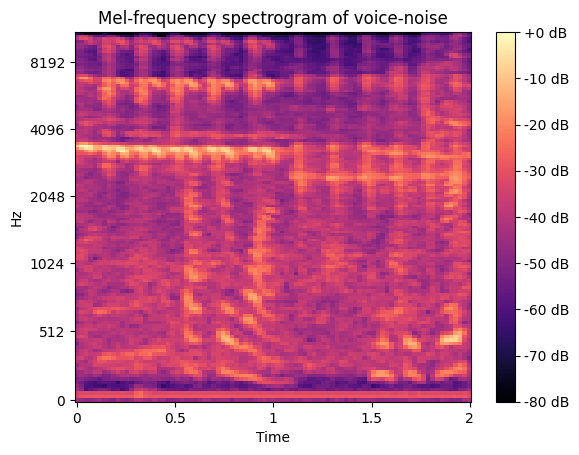
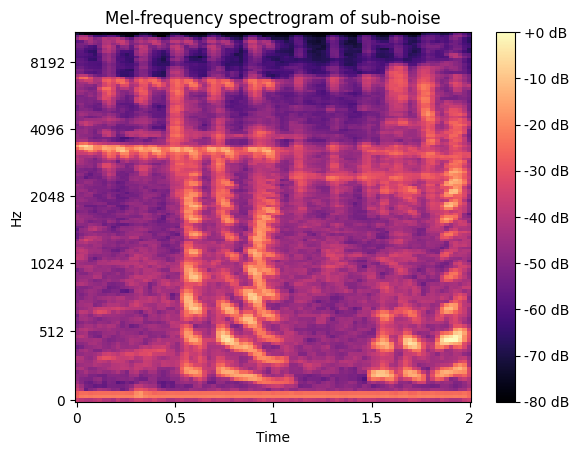